déchargée 1 : Plage de fréquence détectée : 0.00 Hz à 17234.09 Hz
chargée 1 : Plage de fréquence détectée : 7.98 Hz à 17191.21 Hz
déchargée 2 : Plage de fréquence détectée : 9.70 Hz à 17135.72 Hz
chargée 2 : Plage de fréquence détectée : 15.11 Hz à 17241.20 Hz


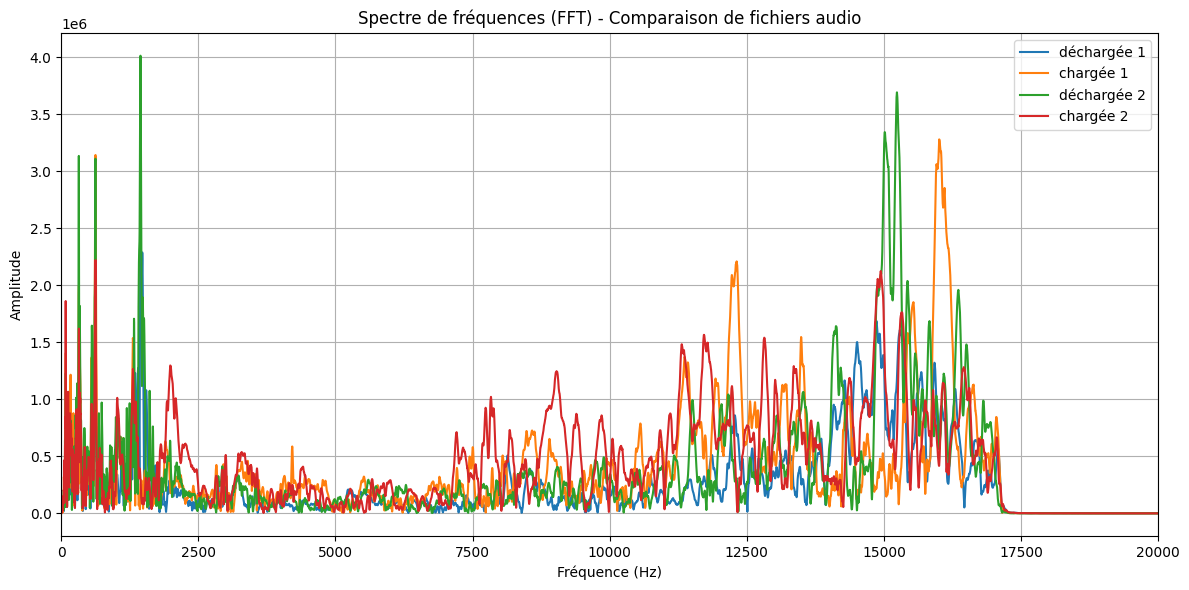

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

def analyse_frequence_audio(fichier_audio, label=None):
    # Lire le fichier audio
    taux_echantillonnage, donnees = wavfile.read(fichier_audio)

    # Si le fichier est stéréo, on ne garde qu'un seul canal
    if donnees.ndim > 1:
        donnees = donnees[:, 0]

    # Nombre total d'échantillons
    N = len(donnees)

    # Appliquer la FFT
    fft_result = np.fft.fft(donnees)
    freqs = np.fft.fftfreq(N, d=1/taux_echantillonnage)

    # Garder seulement les fréquences positives
    freqs_pos = freqs[:N // 2]
    fft_magnitude = np.abs(fft_result[:N // 2])

    # Trouver la fréquence minimale et maximale avec une magnitude significative
    seuil = max(fft_magnitude) * 0.01  # seuil de 1% de l'amplitude max
    indices_utiles = np.where(fft_magnitude > seuil)[0]

    if len(indices_utiles) == 0:
        print(f"{label or fichier_audio} : Aucune fréquence significative détectée.")
        return

    freq_min = freqs_pos[indices_utiles[0]]
    freq_max = freqs_pos[indices_utiles[-1]]

    print(f"{label or fichier_audio} : Plage de fréquence détectée : {freq_min:.2f} Hz à {freq_max:.2f} Hz")

    # Tracer la courbe sur le même graphe
    plt.plot(freqs_pos, fft_magnitude, label=label or fichier_audio)

# === Analyse des fichiers ===
plt.figure(figsize=(12, 6))

analyse_frequence_audio("D1_1.wav", label="déchargée 1")
analyse_frequence_audio("C14_1.wav", label="chargée 1")
analyse_frequence_audio("D25_1.wav", label="déchargée 2")
analyse_frequence_audio("C19_3.wav", label="chargée 2")

# Configuration du graphique
plt.title("Spectre de fréquences (FFT) - Comparaison de fichiers audio")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, 20000)  # Limite haute de fréquence (modifiable selon ton besoin)
plt.legend()
plt.tight_layout()
plt.show()

Experiment 1 : Plage de fréquence détectée : 5.89 Hz à 17251.52 Hz
Experiment 2 : Plage de fréquence détectée : 0.00 Hz à 17238.37 Hz
Experiment 3 : Plage de fréquence détectée : 2.95 Hz à 17142.47 Hz


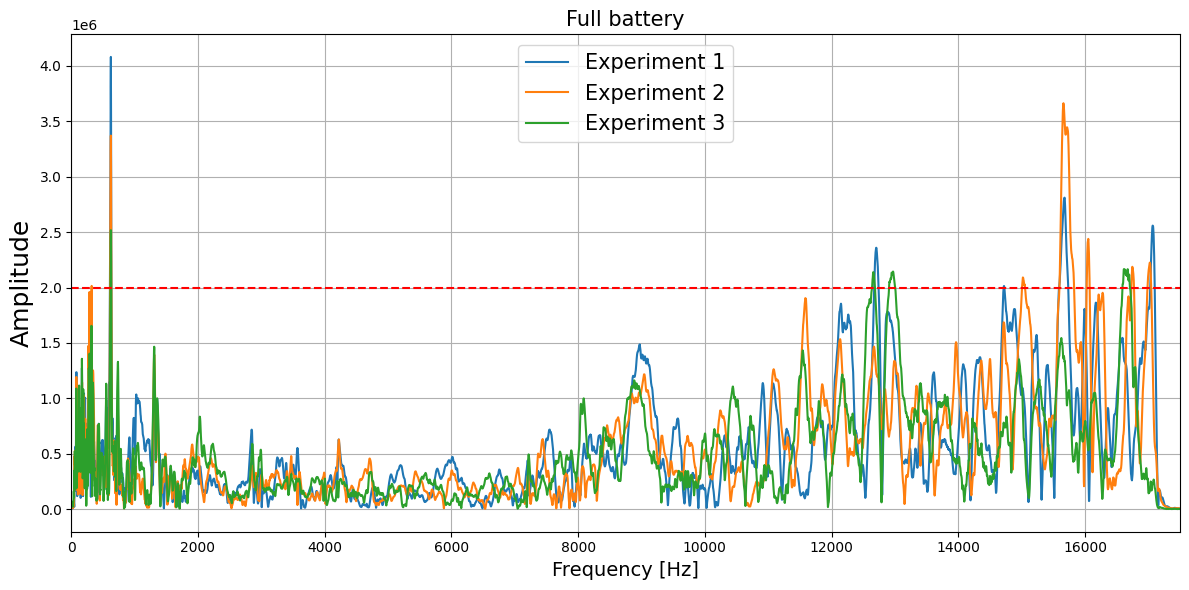

In [7]:
# === Analyse des fichiers ===
plt.figure(figsize=(12, 6))

analyse_frequence_audio("C16_1.wav", label="Experiment 1")
analyse_frequence_audio("C16_2.wav", label="Experiment 2")
analyse_frequence_audio("C16_3.wav", label="Experiment 3")

# Configuration du graphique
plt.hlines(2e6, 0, 20000, color='r', linestyle='--')
plt.title("Full battery", fontsize=15)
plt.xlabel("Frequency [Hz]", fontsize=14)
plt.ylabel("Amplitude", fontsize=18)
plt.grid(True)
plt.xlim(0, 17500)  # Limite haute de fréquence (modifiable selon ton besoin)
#plt.xlim(9000, 15000)
plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig("FS_full.png")
plt.show()

Experiment 1 : Plage de fréquence détectée : 0.00 Hz à 17252.99 Hz
Experiment 2 : Plage de fréquence détectée : 0.00 Hz à 17193.50 Hz
Experiment 3 : Plage de fréquence détectée : 16.14 Hz à 17180.31 Hz


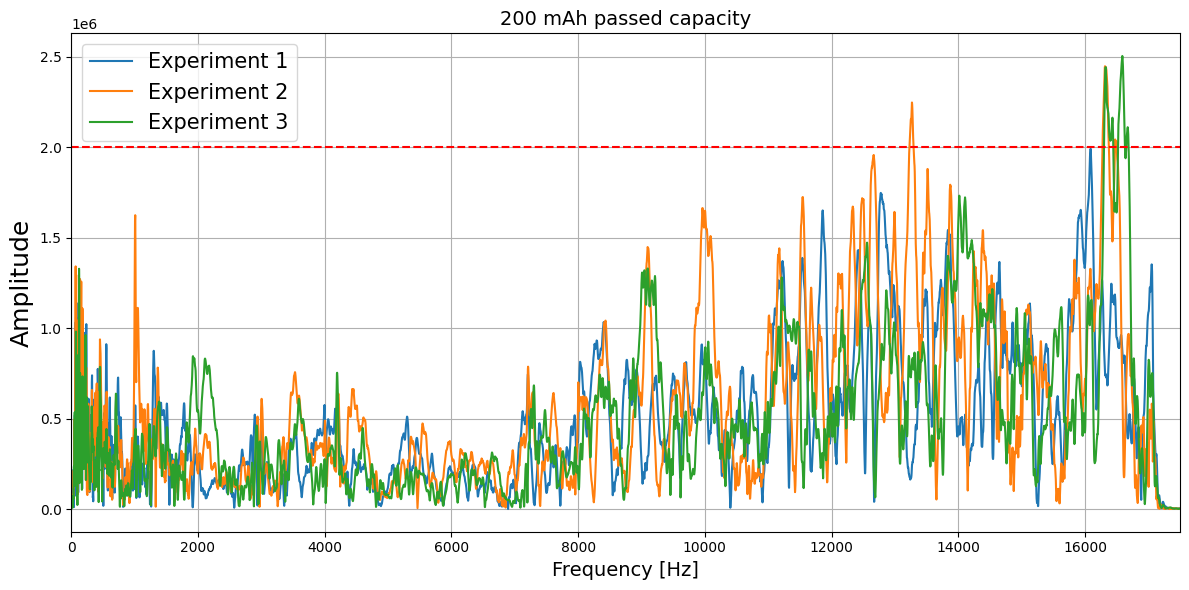

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# === Analyse des fichiers ===
plt.figure(figsize=(12, 6))

analyse_frequence_audio("P3_1.wav", label="Experiment 1")
analyse_frequence_audio("P3_2.wav", label="Experiment 2")
analyse_frequence_audio("P3_3.wav", label="Experiment 3")
#analyse_frequence_audio("P3_4.wav", label="P3 4")
#analyse_frequence_audio("P3_5.wav", label="P3 5")

# Configuration du graphique
plt.hlines(2e6, 0, 20000, color='r', linestyle='--')
plt.title("200 mAh passed capacity", fontsize=14)
plt.xlabel("Frequency [Hz]", fontsize=14)
plt.ylabel("Amplitude", fontsize=18)
plt.grid(True)
plt.xlim(0, 17500)  # Limite haute de fréquence (modifiable selon ton besoin)
#plt.xlim(9000, 15000)
plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig("FS_200.png")
plt.show()

Experiment 1 : Plage de fréquence détectée : 0.00 Hz à 17222.98 Hz
Experiment 2 : Plage de fréquence détectée : 0.00 Hz à 17235.45 Hz
Experiment 3 : Plage de fréquence détectée : 0.00 Hz à 17266.32 Hz


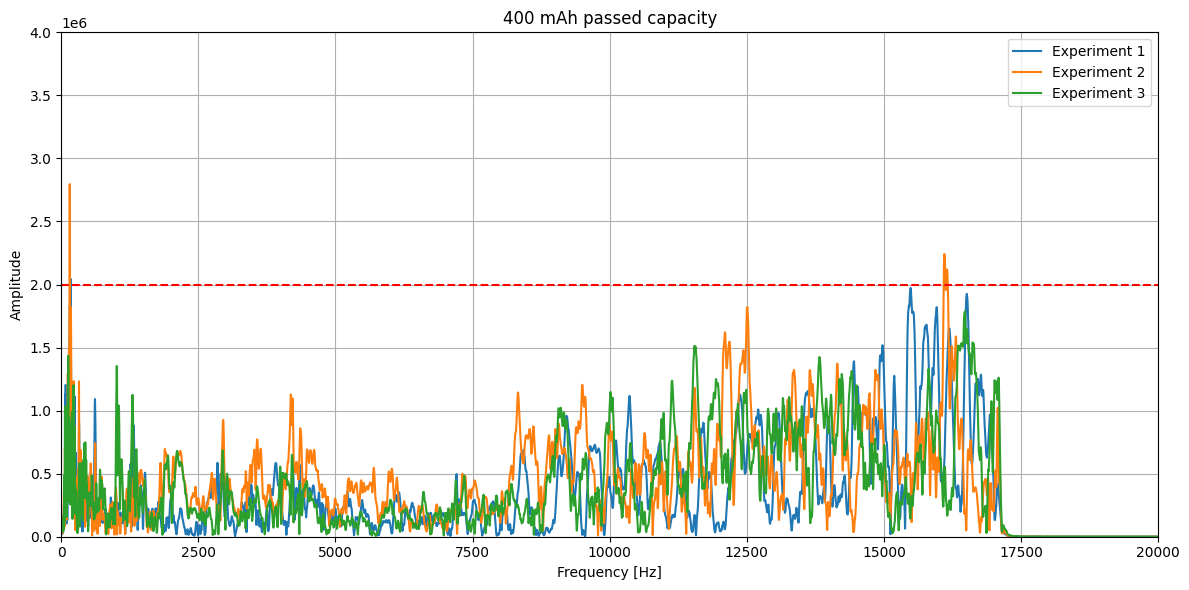

In [9]:
# === Analyse des fichiers ===
plt.figure(figsize=(12, 6))

analyse_frequence_audio("P5_1.wav", label="Experiment 1")
analyse_frequence_audio("P5_2.wav", label="Experiment 2")
analyse_frequence_audio("P5_3.wav", label="Experiment 3")
#analyse_frequence_audio("P5_4.wav", label="P5 4")
#analyse_frequence_audio("P5_5.wav", label="P5 5")

# Configuration du graphique
plt.hlines(2e6, 0, 20000, color='r', linestyle='--')
plt.title("400 mAh passed capacity")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")

plt.grid(True)
plt.xlim(0, 20000)  # Limite haute de fréquence (modifiable selon ton besoin)
plt.ylim(0, 4e6)
plt.legend()
plt.tight_layout()
plt.savefig("FS_400.png")
plt.show()

Experiment 1 : Plage de fréquence détectée : 4.85 Hz à 17236.60 Hz
Experiment 2 : Plage de fréquence détectée : 0.00 Hz à 17206.40 Hz
Experiment 3 : Plage de fréquence détectée : 0.00 Hz à 17218.97 Hz


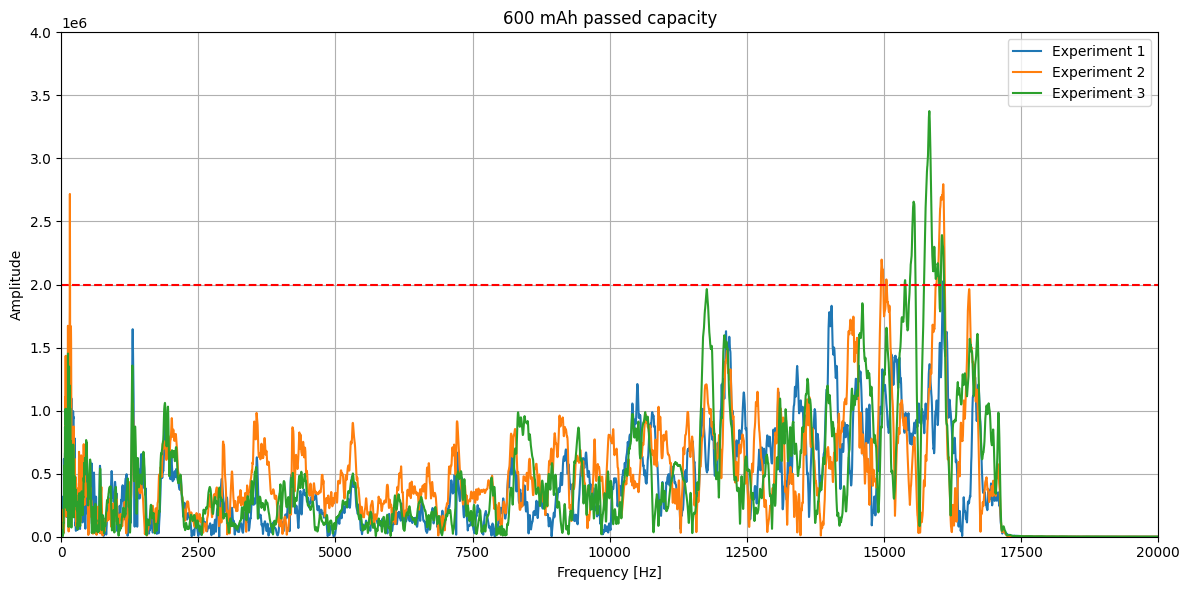

In [10]:
# === Analyse des fichiers ===
plt.figure(figsize=(12, 6))

#analyse_frequence_audio("P7_1.wav", label="Experiment 1")
analyse_frequence_audio("P7_4.wav", label="Experiment 1")
analyse_frequence_audio("P7_2.wav", label="Experiment 2")
analyse_frequence_audio("P7_3.wav", label="Experiment 3")
#analyse_frequence_audio("P7_5.wav", label="P7 5")

# Configuration du graphique
plt.hlines(2e6, 0, 20000, color='r', linestyle='--')
plt.title("600 mAh passed capacity")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, 20000)  # Limite haute de fréquence (modifiable selon ton besoin)
plt.ylim(0, 4e6)
plt.legend()
plt.tight_layout()
plt.savefig("FS_600.png")
plt.show()

Experiment 1 : Plage de fréquence détectée : 30.93 Hz à 17231.22 Hz
Experiment 2 : Plage de fréquence détectée : 0.00 Hz à 17237.30 Hz
Experiment 3 : Plage de fréquence détectée : 0.00 Hz à 17224.91 Hz


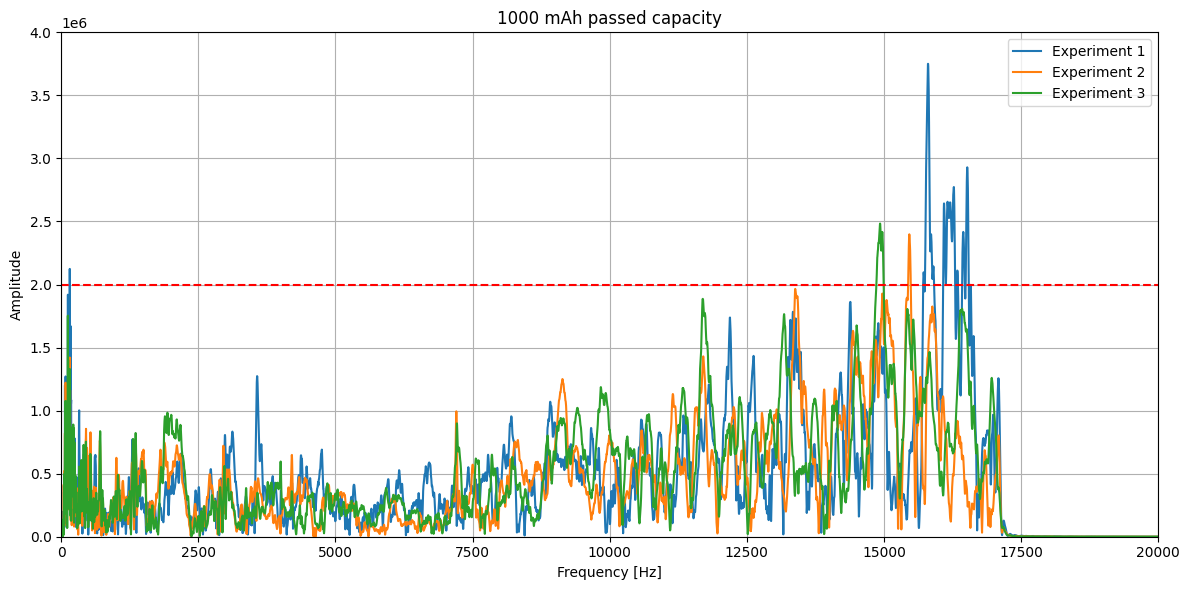

In [11]:
# === Analyse des fichiers ===
plt.figure(figsize=(12, 6))

analyse_frequence_audio("P11_1.wav", label="Experiment 1")
analyse_frequence_audio("P11_2.wav", label="Experiment 2")
analyse_frequence_audio("P11_3.wav", label="Experiment 3")
#analyse_frequence_audio("P11_4.wav", label="P11 4")
#analyse_frequence_audio("P11_5.wav", label="P11 5")

# Configuration du graphique
plt.hlines(2e6, 0, 20000, color='r', linestyle='--')
plt.title("1000 mAh passed capacity")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, 20000)  # Limite haute de fréquence (modifiable selon ton besoin)
plt.ylim(0, 4e6)
plt.legend()
plt.tight_layout()
plt.savefig("FS_1000.png")
plt.show()

Experiment 1 : Plage de fréquence détectée : 0.00 Hz à 17268.74 Hz
Experiment 2 : Plage de fréquence détectée : 0.00 Hz à 17245.21 Hz
Experiment 3 : Plage de fréquence détectée : 14.30 Hz à 17219.10 Hz


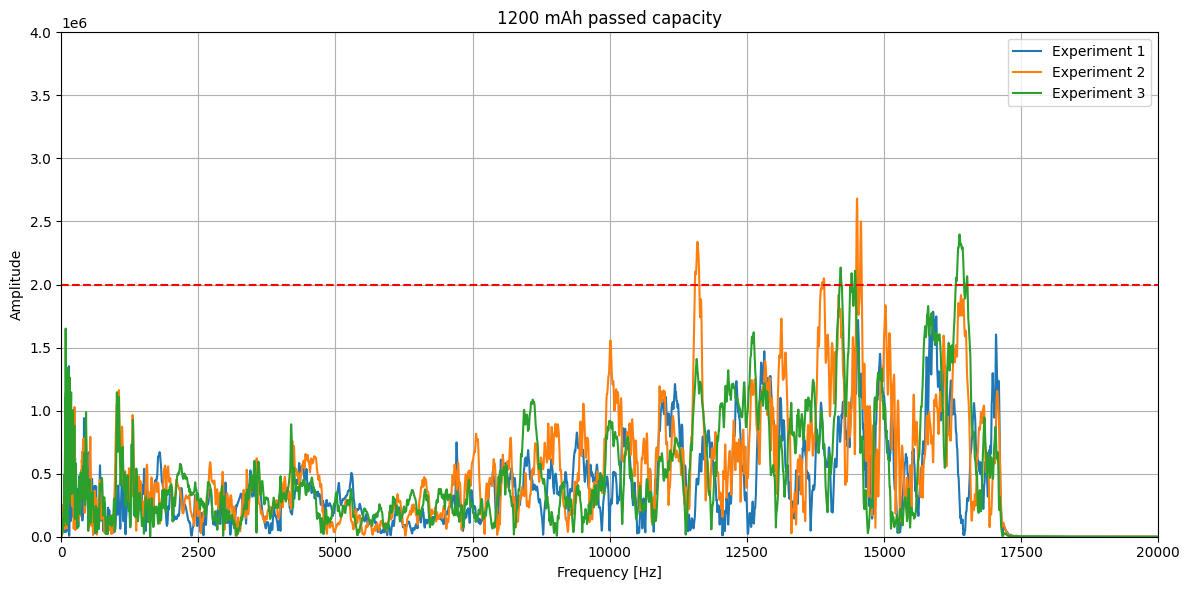

In [12]:
# === Analyse des fichiers ===
plt.figure(figsize=(12, 6))

analyse_frequence_audio("P13_1.wav", label="Experiment 1")
analyse_frequence_audio("P13_2.wav", label="Experiment 2")
analyse_frequence_audio("P13_3.wav", label="Experiment 3")
#analyse_frequence_audio("P13_4.wav", label="P13 4")
#analyse_frequence_audio("P13_5.wav", label="P13 5")

# Configuration du graphique
plt.hlines(2e6, 0, 20000, color='r', linestyle='--')
plt.title("1200 mAh passed capacity")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, 20000)  # Limite haute de fréquence (modifiable selon ton besoin)
plt.ylim(0, 4e6)
plt.legend()
plt.tight_layout()
plt.savefig("FS_1200.png")
plt.show()

Experiment 1 : Plage de fréquence détectée : 10.83 Hz à 17234.05 Hz
Experiment 2 : Plage de fréquence détectée : 3.38 Hz à 17190.03 Hz
Experiment 3 : Plage de fréquence détectée : 7.74 Hz à 17250.80 Hz


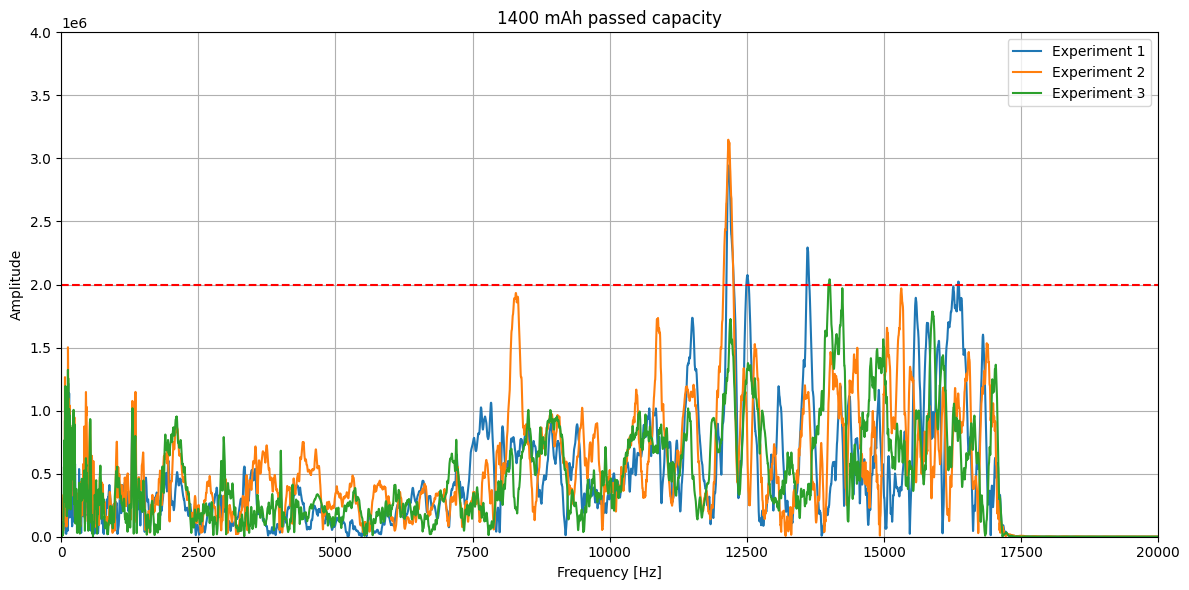

In [13]:
# === Analyse des fichiers ===
plt.figure(figsize=(12, 6))

analyse_frequence_audio("P16_1.wav", label="Experiment 1")
analyse_frequence_audio("P16_2.wav", label="Experiment 2")
analyse_frequence_audio("P16_3.wav", label="Experiment 3")
#analyse_frequence_audio("P16_4.wav", label="P16 4")
#analyse_frequence_audio("P16_5.wav", label="P16 5")

# Configuration du graphique
plt.hlines(2e6, 0, 20000, color='r', linestyle='--')
plt.title("1400 mAh passed capacity")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, 20000)  # Limite haute de fréquence (modifiable selon ton besoin)
plt.ylim(0, 4e6)
plt.legend()
plt.tight_layout()
plt.savefig("FS_1400.png")
plt.show()